In [1]:
!pip install qiskit

import numpy as np

from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram
from qiskit.tools.visualization import circuit_drawer, array_to_latex
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
import qiskit.quantum_info as qi
from qiskit.quantum_info import Statevector

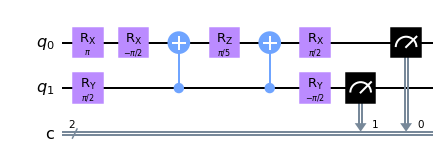

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

## Test circuit
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.rx(pi, qreg_q[0])
circuit.ry(pi / 2, qreg_q[1])
circuit.rx(-pi / 2, qreg_q[0])
circuit.cx(qreg_q[1], qreg_q[0])
circuit.rz(pi / 5, qreg_q[0])
circuit.cx(qreg_q[1], qreg_q[0])
circuit.rx(pi / 2, qreg_q[0])
circuit.ry(-pi / 2, qreg_q[1])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[0], creg_c[0])

circuit.draw()

In [3]:
## Test simulation
sim = Aer.get_backend('aer_simulator')
res = sim.run(circuit, shots=10000).result()
counts = res.get_counts()
plot_histogram(counts)
print(counts)

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


{'10': 967, '01': 9033}


In [4]:
## Define and calculate operation matrices
RZ = np.array([[1, 0],
               [0, -1]])
RX = np.array([[0, 1],
               [1, 0]])
RY = np.array([[0, np.imag(0 - 1j)],
               [np.imag(0 + 1j), 0]])
I = np.array([[1, 0],
              [0, 1]])
Z0 = np.kron(I, RZ)
Z1 = np.kron(RZ, I)
Z0Z1 = np.kron(RZ, RZ)
X0X1 = np.kron(RX, RX)
Y0Y1 = np.kron(RY, RY)

print(Z0)
print(Z1)
print(Z0Z1)
print(X0X1)
print(Y0Y1)

[[ 1  0  0  0]
 [ 0 -1  0  0]
 [ 0  0  1  0]
 [ 0  0  0 -1]]
[[ 1  0  0  0]
 [ 0  1  0  0]
 [ 0  0 -1  0]
 [ 0  0  0 -1]]
[[ 1  0  0  0]
 [ 0 -1  0  0]
 [ 0  0 -1  0]
 [ 0  0  0  1]]
[[0 0 0 1]
 [0 0 1 0]
 [0 1 0 0]
 [1 0 0 0]]
[[ 0. -0. -0.  1.]
 [ 0.  0. -1. -0.]
 [ 0. -1.  0. -0.]
 [ 1.  0.  0.  0.]]


In [5]:
# Test operation matrices
v = np.array([0, 0, 1, 0])
print(np.matmul(v, Z0))
print(np.matmul(v, X0X1))
print(np.matmul(v, Y0Y1))
print(Z0Z1)

[0 0 1 0]
[0 1 0 0]
[ 0. -1.  0.  0.]
[[ 1  0  0  0]
 [ 0 -1  0  0]
 [ 0  0 -1  0]
 [ 0  0  0  1]]


In [6]:
## Import Hamiltonian Coefficients
Hc=[[0.20,2.8489,0.5678,-1.4508,0.6799,0.0791,0.0791
],[0.25,2.1868,0.5449,-1.2870,0.6719,0.0798,0.0798
],[0.30,1.7252,0.5215,-1.1458,0.6631,0.0806,0.0806
],[0.35,1.3827,0.4982,-1.0226,0.6537,0.0815,0.0815
],[0.40,-0.2047,0.4754,-0.9145,0.6438,0.0825,0.0825
],[0.45,-0.2677,0.4534,-0.8194,0.6336,0.0835,0.0835
],[0.50,-0.3202,0.4325,-0.7355,0.6233,0.0846,0.0846
],[0.55,-0.3642,0.4125,-0.6612,0.6129,0.0858,0.0858
],[0.60,-0.4012,0.3937,-0.5950,0.6025,0.0870,0.0870
],[0.65,-0.4323,0.3760,-0.5358,0.5921,0.0883,0.0883
],[0.70,-0.4584,0.3593,-0.4826,0.5818,0.0896,0.0896
],[0.75,-0.4804,0.3435,-0.4347,0.5716,0.0910,0.0910
],[0.80,-0.4989,0.3288,-0.3915,0.5616,0.0925,0.0925
],[0.85,-0.5143,0.3149,-0.3523,0.5518,0.0939,0.0939
],[0.90,-0.5271,0.3018,-0.3168,0.5421,0.0954,0.0954
],[0.95,-0.5377,0.2895,-0.2845,0.5327,0.0970,0.0970
],[1.00,-0.5463,0.2779,-0.2550,0.5235,0.0986,0.0986
],[1.05,-0.5533,0.2669,-0.2282,0.5146,0.1002,0.1002
],[1.10,-0.5588,0.2565,-0.2036,0.5059,0.1018,0.1018
],[1.15,-0.5631,0.2467,-0.1810,0.4974,0.1034,0.1034
],[1.20,-0.5663,0.2374,-0.1603,0.4892,0.1050,0.1050
],[1.25,-0.5685,0.2286,-0.1413,0.4812,0.1067,0.1067
],[1.30,-0.5699,0.2203,-0.1238,0.4735,0.1083,0.1083
],[1.35,-0.5706,0.2123,-0.1077,0.4660,0.1100,0.1100
],[1.40,-0.5707,0.2048,-0.0929,0.4588,0.1116,0.1116
],[1.45,-0.5702,0.1976,-0.0792,0.4518,0.1133,0.1133
],[1.50,-0.5693,0.1908,-0.0666,0.4451,0.1149,0.1149
],[1.55,-0.5679,0.1843,-0.0549,0.4386,0.1165,0.1165
],[1.60,-0.5663,0.1782,-0.0442,0.4323,0.1181,0.1181
],[1.65,-0.5643,0.1723,-0.0342,0.4262,0.1196,0.1196
],[1.70,-0.5621,0.1667,-0.0251,0.4204,0.1211,0.1211
],[1.75,-0.5597,0.1615,-0.0166,0.4148,0.1226,0.1226
],[1.80,-0.5571,0.1565,-0.0088,0.4094,0.1241,0.1241
],[1.85,-0.5544,0.1517,-0.0015,0.4042,0.1256,0.1256
],[1.90,-0.5516,0.1472,0.0052,0.3992,0.1270,0.1270
],[1.95,-0.5488,0.1430,0.0114,0.3944,0.1284,0.1284
],[2.00,-0.5458,0.1390,0.0171,0.3898,0.1297,0.1297
],[2.05,-0.5429,0.1352,0.0223,0.3853,0.1310,0.1310
],[2.10,-0.5399,0.1316,0.0272,0.3811,0.1323,0.1323
],[2.15,-0.5369,0.1282,0.0317,0.3769,0.1335,0.1335
],[2.20,-0.5339,0.1251,0.0359,0.3730,0.1347,0.1347
],[2.25,-0.5310,0.1221,0.0397,0.3692,0.1359,0.1359
],[2.30,-0.5280,0.1193,0.0432,0.3655,0.1370,0.1370
],[2.35,-0.5251,0.1167,0.0465,0.3620,0.1381,0.1381
],[2.40,-0.5223,0.1142,0.0495,0.3586,0.1392,0.1392
],[2.45,-0.5195,0.1119,0.0523,0.3553,0.1402,0.1402
],[2.50,-0.5168,0.1098,0.0549,0.3521,0.1412,0.1412
],[2.55,-0.5141,0.1078,0.0572,0.3491,0.1422,0.1422
],[2.60,-0.5114,0.1059,0.0594,0.3461,0.1432,0.1432
],[2.65,-0.5089,0.1042,0.0614,0.3433,0.1441,0.1441
],[2.70,-0.5064,0.1026,0.0632,0.3406,0.1450,0.1450
],[2.75,-0.5039,0.1011,0.0649,0.3379,0.1458,0.1458
],[2.80,-0.5015,0.0997,0.0665,0.3354,0.1467,0.1467
],[2.85,-0.4992,0.0984,0.0679,0.3329,0.1475,0.1475]]

In [7]:
# Test energy calculation
for i in Hc:
    if i[0] == 0.75:
        g0 = i[1]
        g1 = i[2]
        g2 = i[3]
        g3 = i[4]
        g4 = i[5]
        g5 = i[6]

Hmol = (g0 * np.kron( I, I) + # g0 * I
g1 * Z0 +
g2 * Z1 +
g3 * Z0Z1 +
g4 * Y0Y1 +
g5 * X0X1)

print(Hmol)

[[ 1.11022302e-16  0.00000000e+00  0.00000000e+00  1.82000000e-01]
 [ 0.00000000e+00 -1.83020000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -2.73800000e-01  0.00000000e+00]
 [ 1.82000000e-01  0.00000000e+00  0.00000000e+00  1.82400000e-01]]


In [8]:
## Iterating through theta's

## run simulation
def get_energy(cir):
    sim = Aer.get_backend('aer_simulator')
    res = sim.run(cir, shots=10000).result()
    counts = res.get_counts()
    return counts


r = []
for i in range(100):
    theta = -pi+(i/99)*(2*pi)
    ## Redefining circuit
    qreg_q = QuantumRegister(2, 'q')
    creg_c = ClassicalRegister(2, 'c')
    circuit = QuantumCircuit(qreg_q, creg_c)

    circuit.rx(pi, qreg_q[0])
    circuit.ry(pi / 2, qreg_q[1])
    circuit.rx(-pi / 2, qreg_q[0])
    circuit.cx(qreg_q[1], qreg_q[0])
    circuit.rz(theta, qreg_q[0])
    circuit.cx(qreg_q[1], qreg_q[0])
    circuit.rx(pi / 2, qreg_q[0])
    circuit.ry(-pi / 2, qreg_q[1])
    circuit.measure(qreg_q[1], creg_c[1])
    circuit.measure(qreg_q[0], creg_c[0])
    
    r.append(get_energy(circuit))
print(r)


[{'10': 10000}, {'01': 11, '10': 9989}, {'01': 32, '10': 9968}, {'01': 90, '10': 9910}, {'01': 166, '10': 9834}, {'01': 225, '10': 9775}, {'01': 365, '10': 9635}, {'01': 487, '10': 9513}, {'01': 631, '10': 9369}, {'10': 9186, '01': 814}, {'01': 975, '10': 9025}, {'01': 1190, '10': 8810}, {'10': 8622, '01': 1378}, {'01': 1574, '10': 8426}, {'01': 1804, '10': 8196}, {'01': 2097, '10': 7903}, {'10': 7645, '01': 2355}, {'10': 7341, '01': 2659}, {'10': 7115, '01': 2885}, {'01': 3231, '10': 6769}, {'01': 3465, '10': 6535}, {'01': 3840, '10': 6160}, {'01': 4123, '10': 5877}, {'01': 4381, '10': 5619}, {'01': 4835, '10': 5165}, {'10': 4809, '01': 5191}, {'01': 5388, '10': 4612}, {'10': 4274, '01': 5726}, {'01': 6101, '10': 3899}, {'10': 3690, '01': 6310}, {'10': 3377, '01': 6623}, {'10': 2987, '01': 7013}, {'01': 7208, '10': 2792}, {'10': 2481, '01': 7519}, {'10': 2193, '01': 7807}, {'10': 2002, '01': 7998}, {'10': 1673, '01': 8327}, {'10': 1387, '01': 8613}, {'01': 8734, '10': 1266}, {'01': 89

In [9]:
## Converting each result distribution to probablity
for d in r:
    s = sum(d.values())
    for key in d:
        d[key] = d[key]/s

print(r)

[{'10': 1.0}, {'01': 0.0011, '10': 0.9989}, {'01': 0.0032, '10': 0.9968}, {'01': 0.009, '10': 0.991}, {'01': 0.0166, '10': 0.9834}, {'01': 0.0225, '10': 0.9775}, {'01': 0.0365, '10': 0.9635}, {'01': 0.0487, '10': 0.9513}, {'01': 0.0631, '10': 0.9369}, {'10': 0.9186, '01': 0.0814}, {'01': 0.0975, '10': 0.9025}, {'01': 0.119, '10': 0.881}, {'10': 0.8622, '01': 0.1378}, {'01': 0.1574, '10': 0.8426}, {'01': 0.1804, '10': 0.8196}, {'01': 0.2097, '10': 0.7903}, {'10': 0.7645, '01': 0.2355}, {'10': 0.7341, '01': 0.2659}, {'10': 0.7115, '01': 0.2885}, {'01': 0.3231, '10': 0.6769}, {'01': 0.3465, '10': 0.6535}, {'01': 0.384, '10': 0.616}, {'01': 0.4123, '10': 0.5877}, {'01': 0.4381, '10': 0.5619}, {'01': 0.4835, '10': 0.5165}, {'10': 0.4809, '01': 0.5191}, {'01': 0.5388, '10': 0.4612}, {'10': 0.4274, '01': 0.5726}, {'01': 0.6101, '10': 0.3899}, {'10': 0.369, '01': 0.631}, {'10': 0.3377, '01': 0.6623}, {'10': 0.2987, '01': 0.7013}, {'01': 0.7208, '10': 0.2792}, {'10': 0.2481, '01': 0.7519}, {'10

In [10]:
## Separating probablities of '01' and '10' with respect to theta
x_axis = [-pi+(i/99)*(2*pi) for i in range(100)]
y_axis01 = []
y_axis10 = []
for d in r:
    if '01' in d.keys():
        y_axis01.append(d['01'])
    else:
        y_axis01.append(0)
        
for d in r:
    if '10' in d.keys():
        y_axis10.append(d['10'])
    else:
        y_axis10.append(0)

print(x_axis)
print(y_axis01)
print(y_axis10)
print(len(x_axis))
print(len(y_axis01))
print(len(y_axis10))
if len(x_axis) == len(y_axis01) == len(y_axis10):
    print("Ready to plot")

[-3.141592653589793, -3.0781261353354537, -3.0146596170811146, -2.951193098826775, -2.887726580572436, -2.8242600623180967, -2.7607935440637577, -2.697327025809418, -2.633860507555079, -2.5703939893007397, -2.5069274710464007, -2.443460952792061, -2.379994434537722, -2.3165279162833827, -2.2530613980290437, -2.1895948797747042, -2.126128361520365, -2.0626618432660258, -1.9991953250116865, -1.9357288067573473, -1.872262288503008, -1.8087957702486688, -1.7453292519943295, -1.6818627337399903, -1.618396215485651, -1.5549296972313116, -1.4914631789769723, -1.4279966607226333, -1.364530142468294, -1.3010636242139548, -1.2375971059596154, -1.1741305877052761, -1.1106640694509369, -1.0471975511965979, -0.9837310329422584, -0.9202645146879194, -0.8567979964335799, -0.7933314781792404, -0.7298649599249014, -0.6663984416705624, -0.6029319234162229, -0.5394654051618835, -0.47599888690754444, -0.412532368653205, -0.34906585039886595, -0.28559933214452693, -0.22213281389018746, -0.158666295635848, 

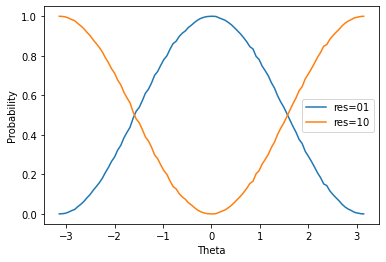

In [14]:
import matplotlib.pyplot as plt

plt.plot(x_axis, y_axis01)
plt.plot(x_axis, y_axis10)
plt.ylabel('Probability')
plt.xlabel('Theta')
plt.legend(['res=01', 'res=10'])
plt.show()